# Heart Disease Prediction using Artificial Neural Network

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Part 1 - Data Preprocessing

## Importing the dataset

In [2]:
dataset = pd.read_csv('heart.csv')

In [3]:
dataset.shape

(1025, 14)

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
X = dataset.iloc[:, :-1].values
print(X)

[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]


In [9]:
y = dataset.iloc[:, -1].values
print(y)

[0 0 0 ... 0 1 0]


# Exploratory Data Analysis

### Histogram

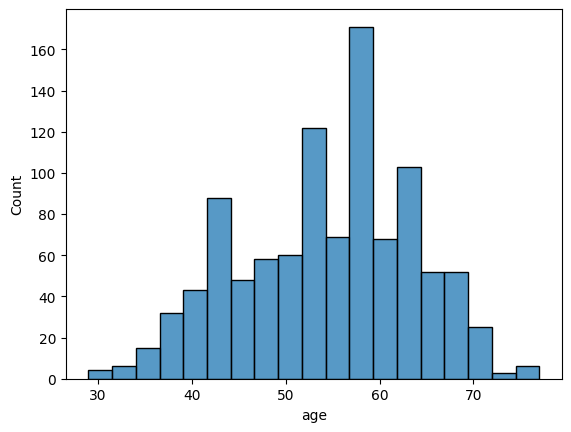

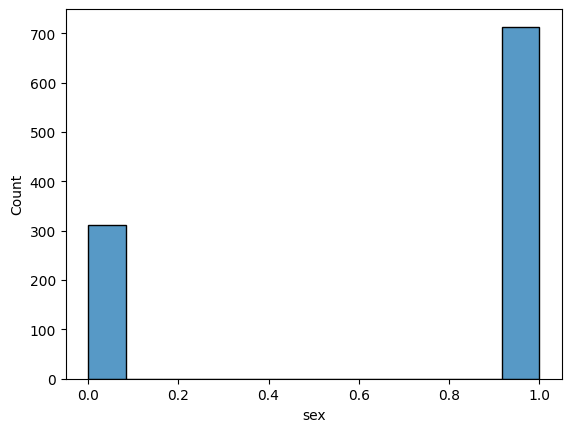

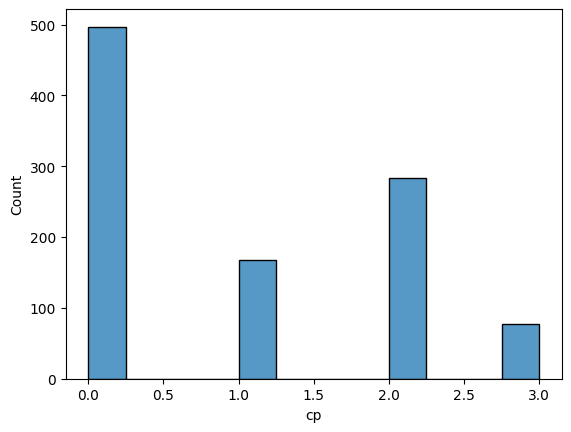

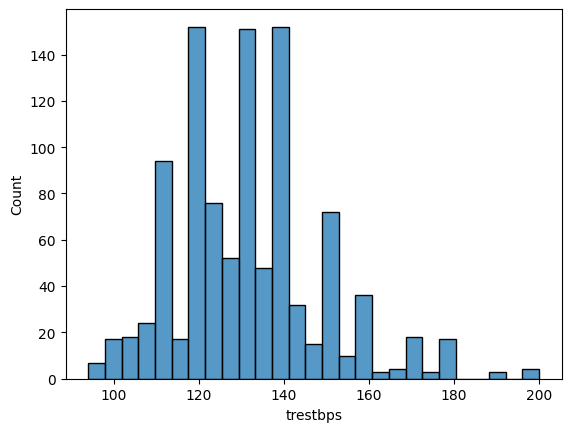

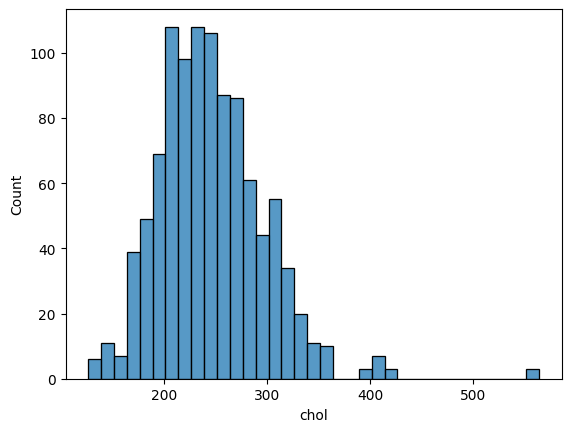

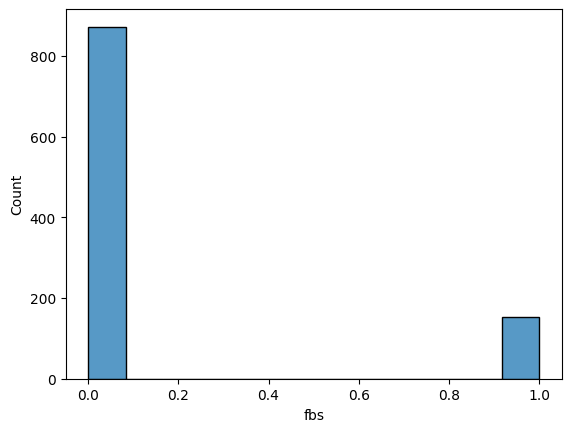

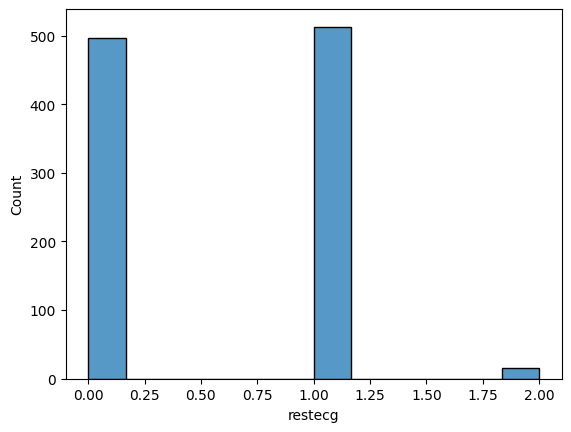

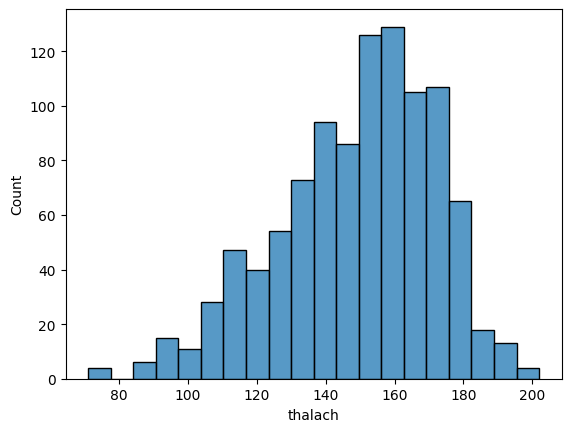

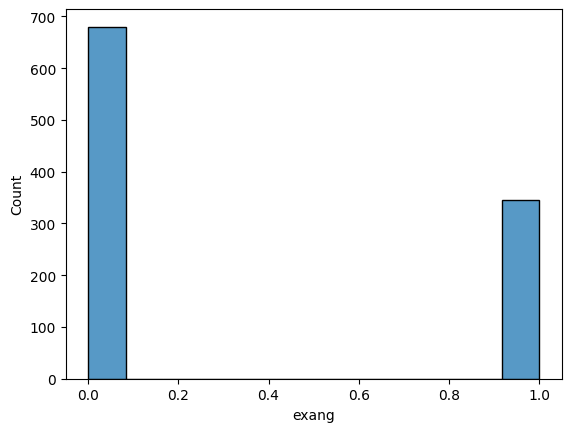

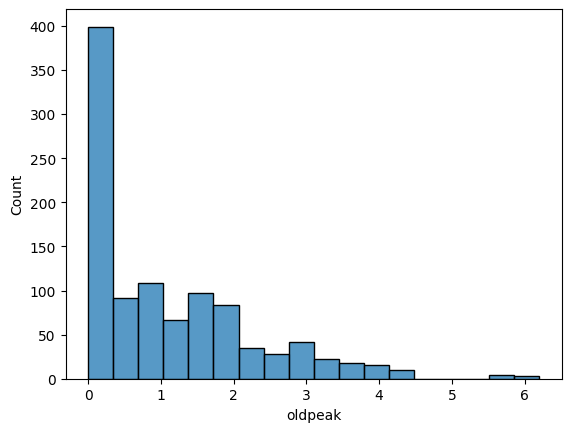

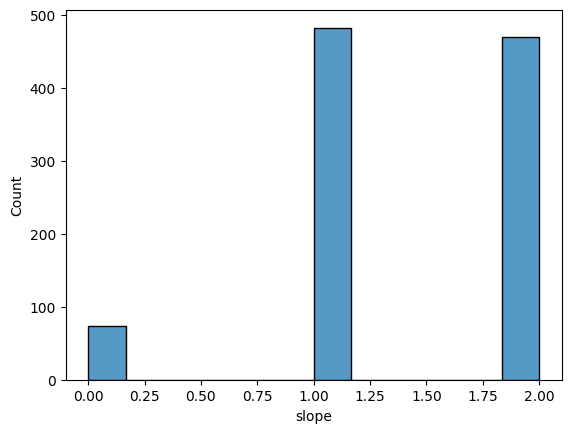

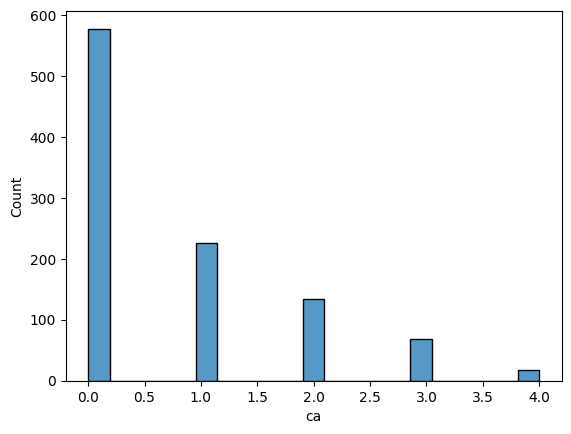

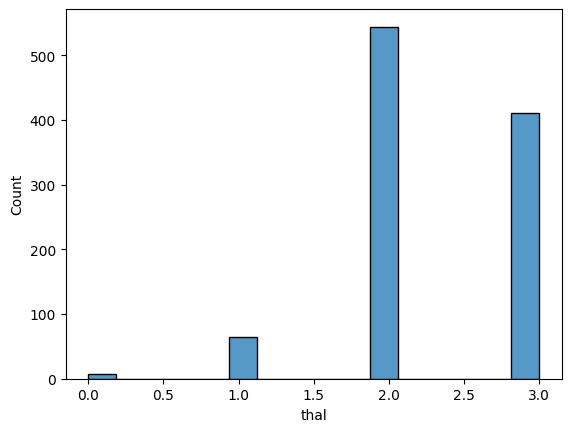

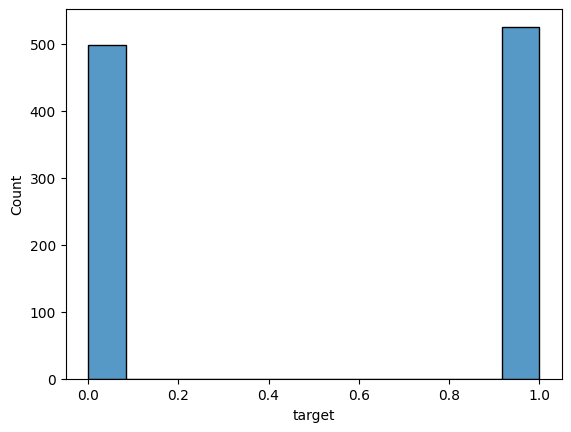

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in dataset.select_dtypes(include = 'number'):
    sns.histplot(data = dataset, x = i)
    plt.show()

### Checking for outliers

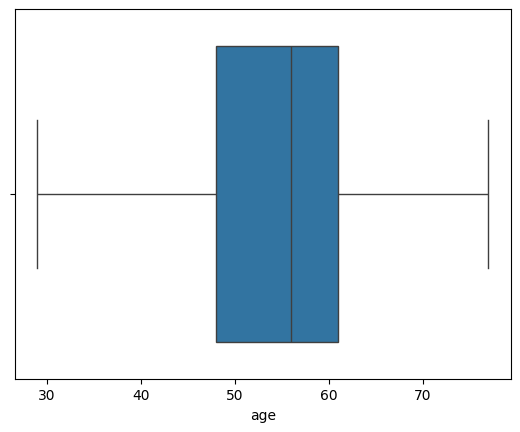

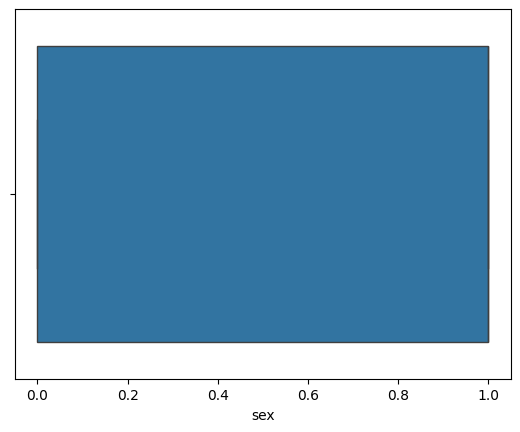

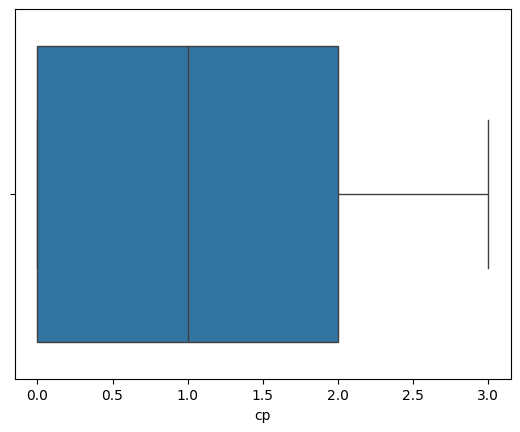

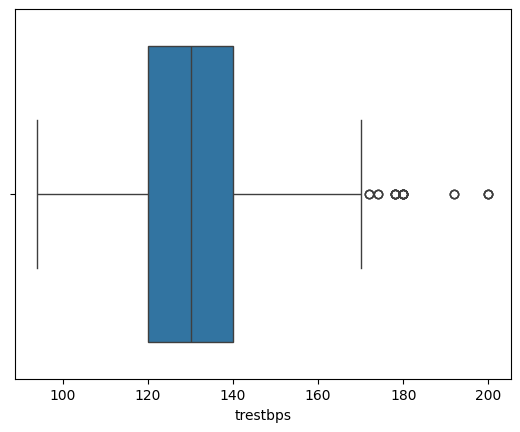

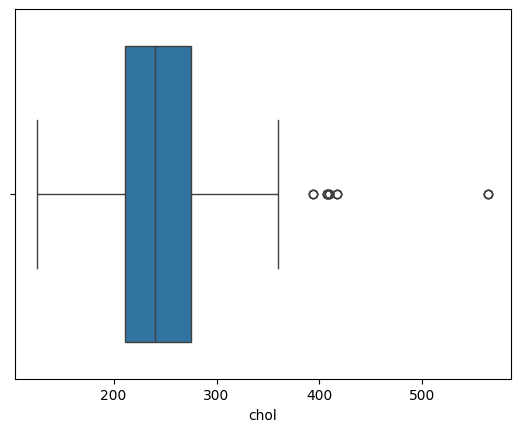

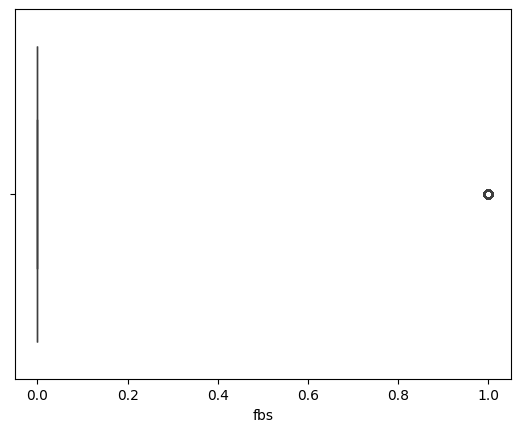

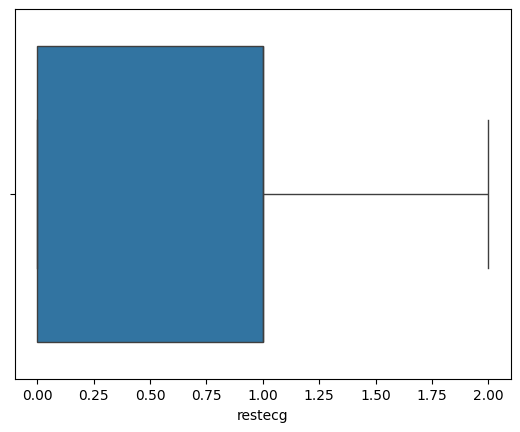

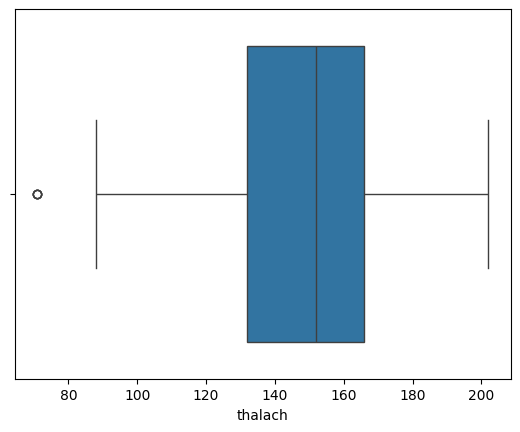

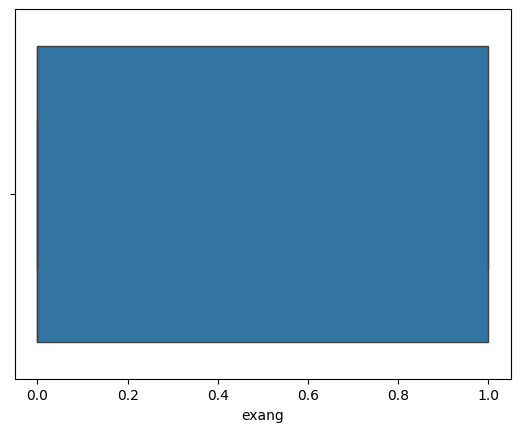

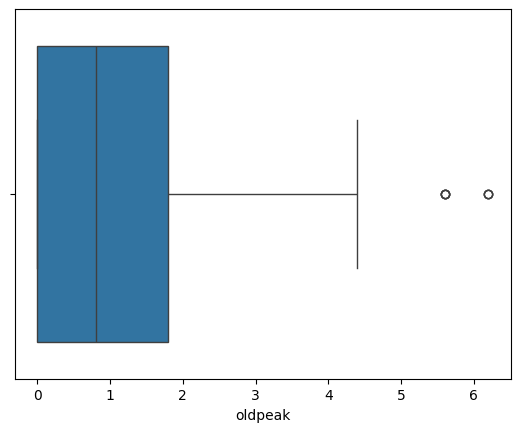

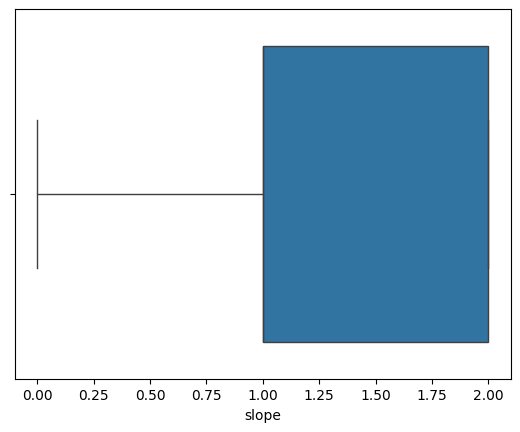

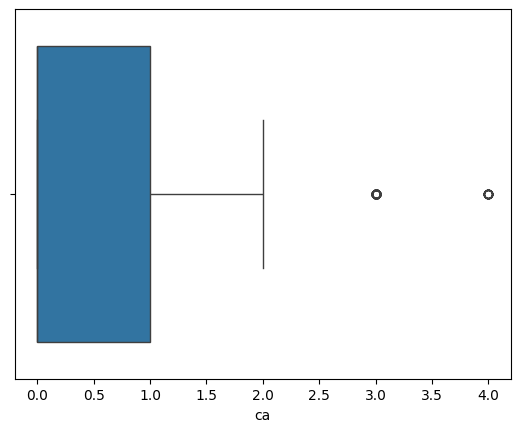

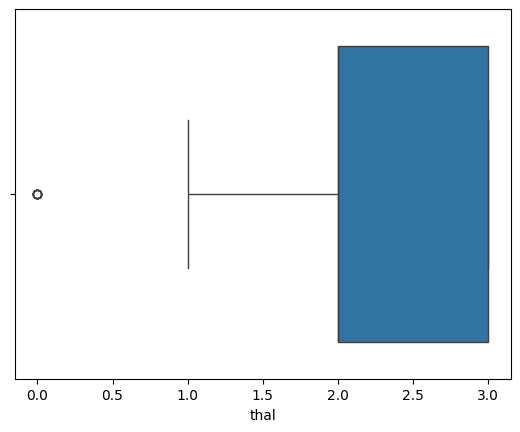

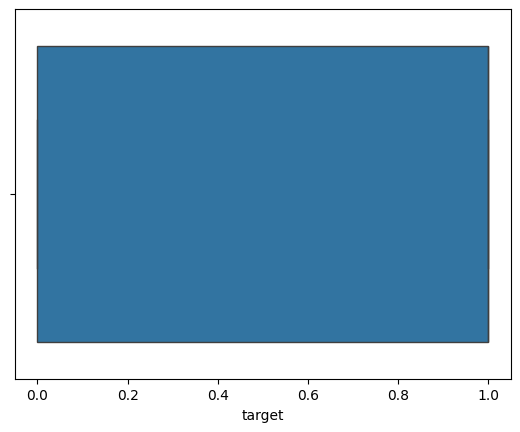

In [11]:
for i in dataset.select_dtypes(include = 'number').columns:
    sns.boxplot(data = dataset, x = i)
    plt.show()

### Relation between the features and target

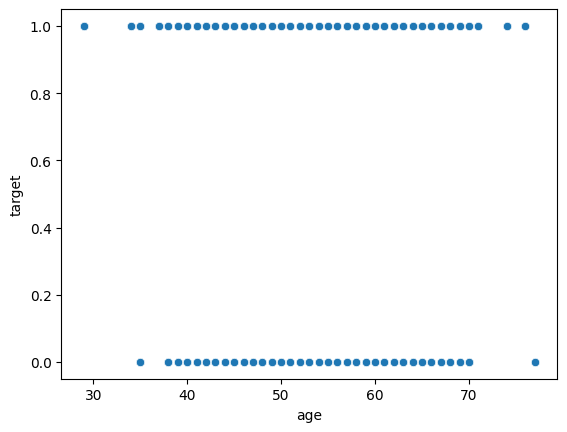

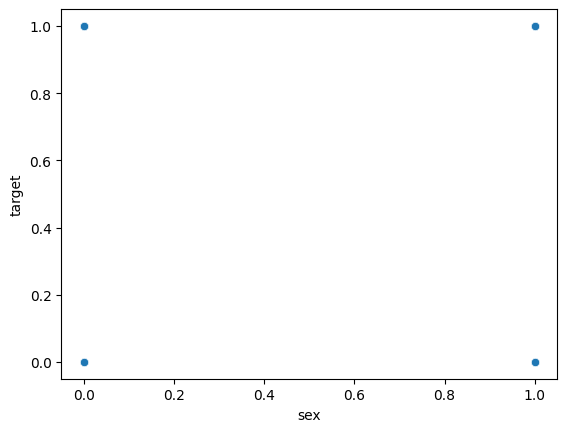

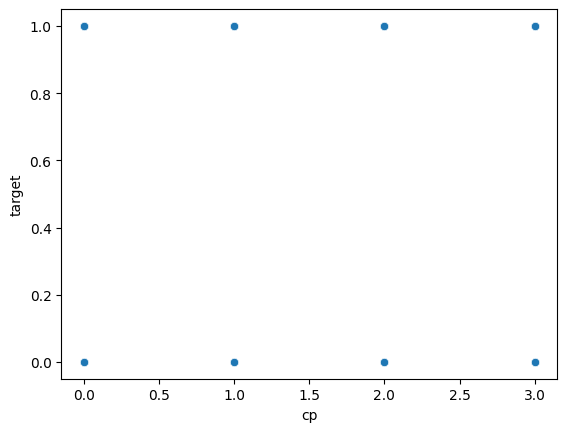

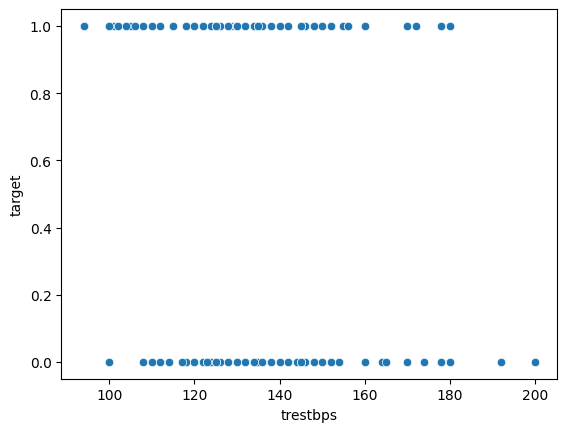

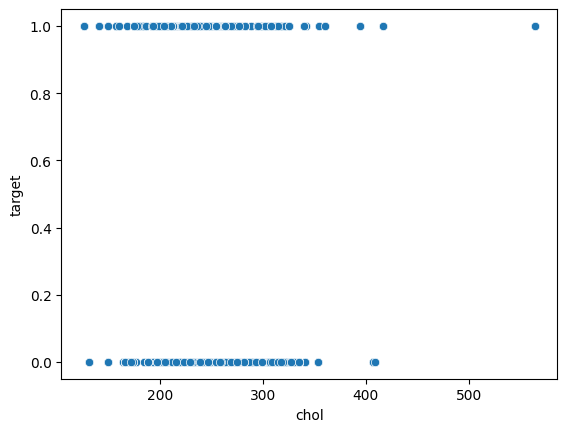

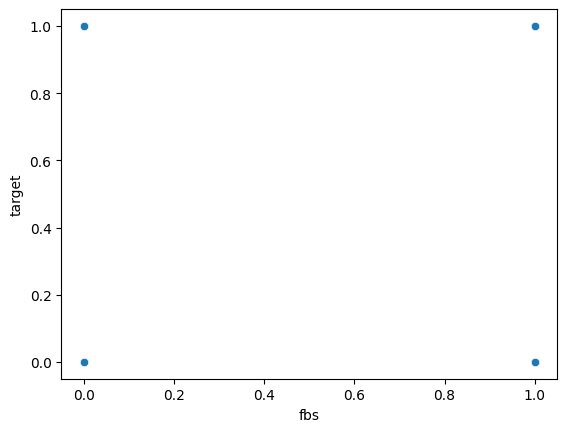

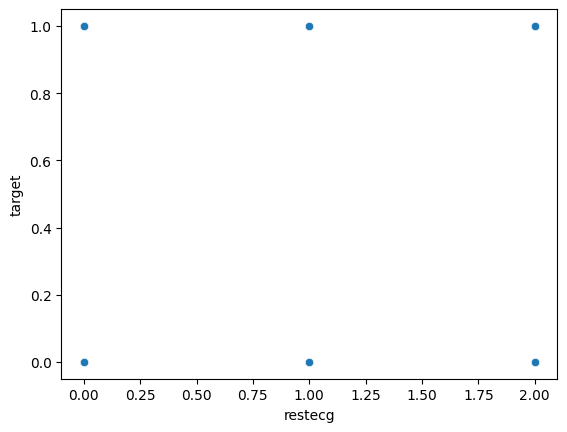

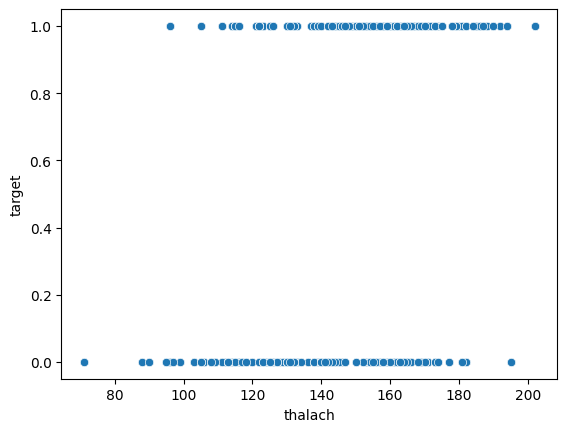

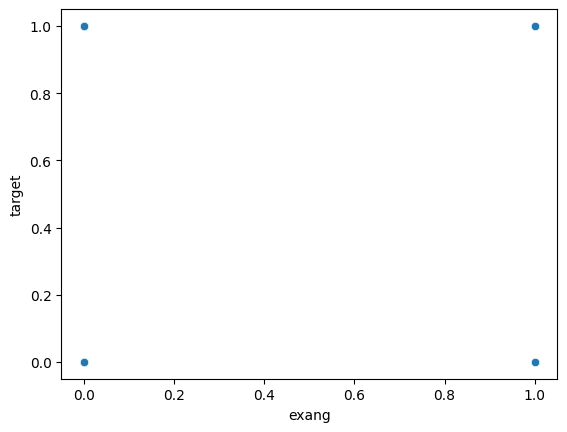

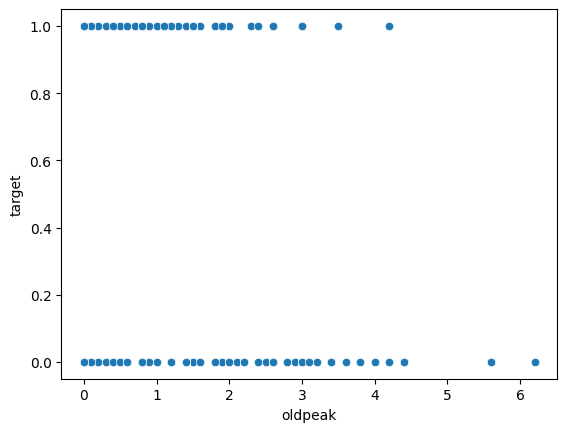

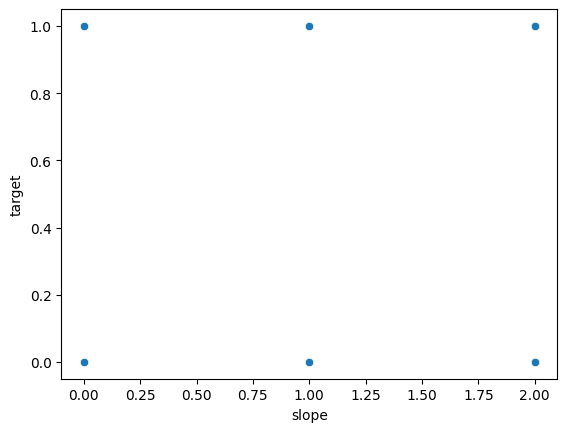

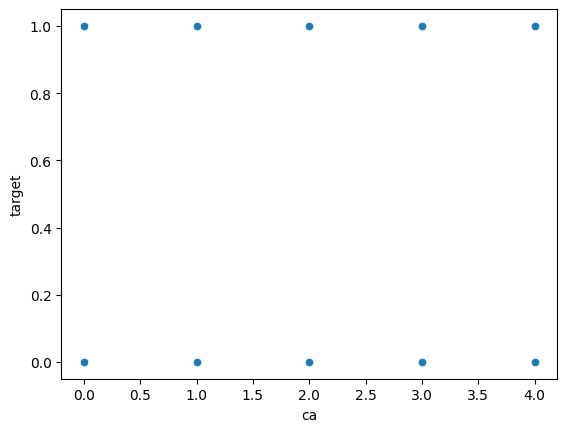

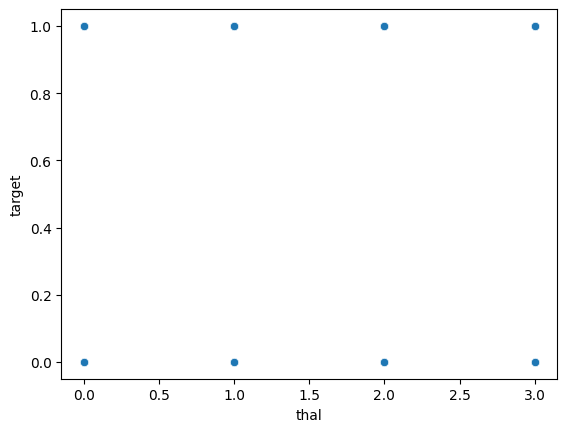

In [12]:
for i in dataset.columns[:-1]:
    sns.scatterplot(data = dataset, x = i, y = 'target')
    plt.show()

### Correlation Matrix

In [13]:
s = dataset.iloc[:-1, :-1].corr()
print(s)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103232 -0.072039  0.271149  0.219906  0.121234   
sex      -0.103232  1.000000 -0.040553 -0.078579 -0.197696  0.027479   
cp       -0.072039 -0.040553  1.000000  0.037608 -0.082732  0.078958   
trestbps  0.271149 -0.078579  0.037608  1.000000  0.127355  0.181550   
chol      0.219906 -0.197696 -0.082732  0.127355  1.000000  0.026476   
fbs       0.121234  0.027479  0.078958  0.181550  0.026476  1.000000   
restecg  -0.132706 -0.055726  0.044413 -0.123291 -0.146579 -0.103736   
thalach  -0.390772 -0.048419  0.305929 -0.040339 -0.023540 -0.009521   
exang     0.088152  0.139681 -0.402414  0.060764  0.066658  0.048986   
oldpeak   0.208158  0.084527 -0.174562  0.187663  0.065230  0.010975   
slope    -0.169167 -0.026274  0.131153 -0.120898 -0.014945 -0.062175   
ca        0.271570  0.111602 -0.176070  0.104734  0.074570  0.137269   
thal      0.072390  0.197877 -0.162528  0.060030  0.101563 -0.04

<Axes: >

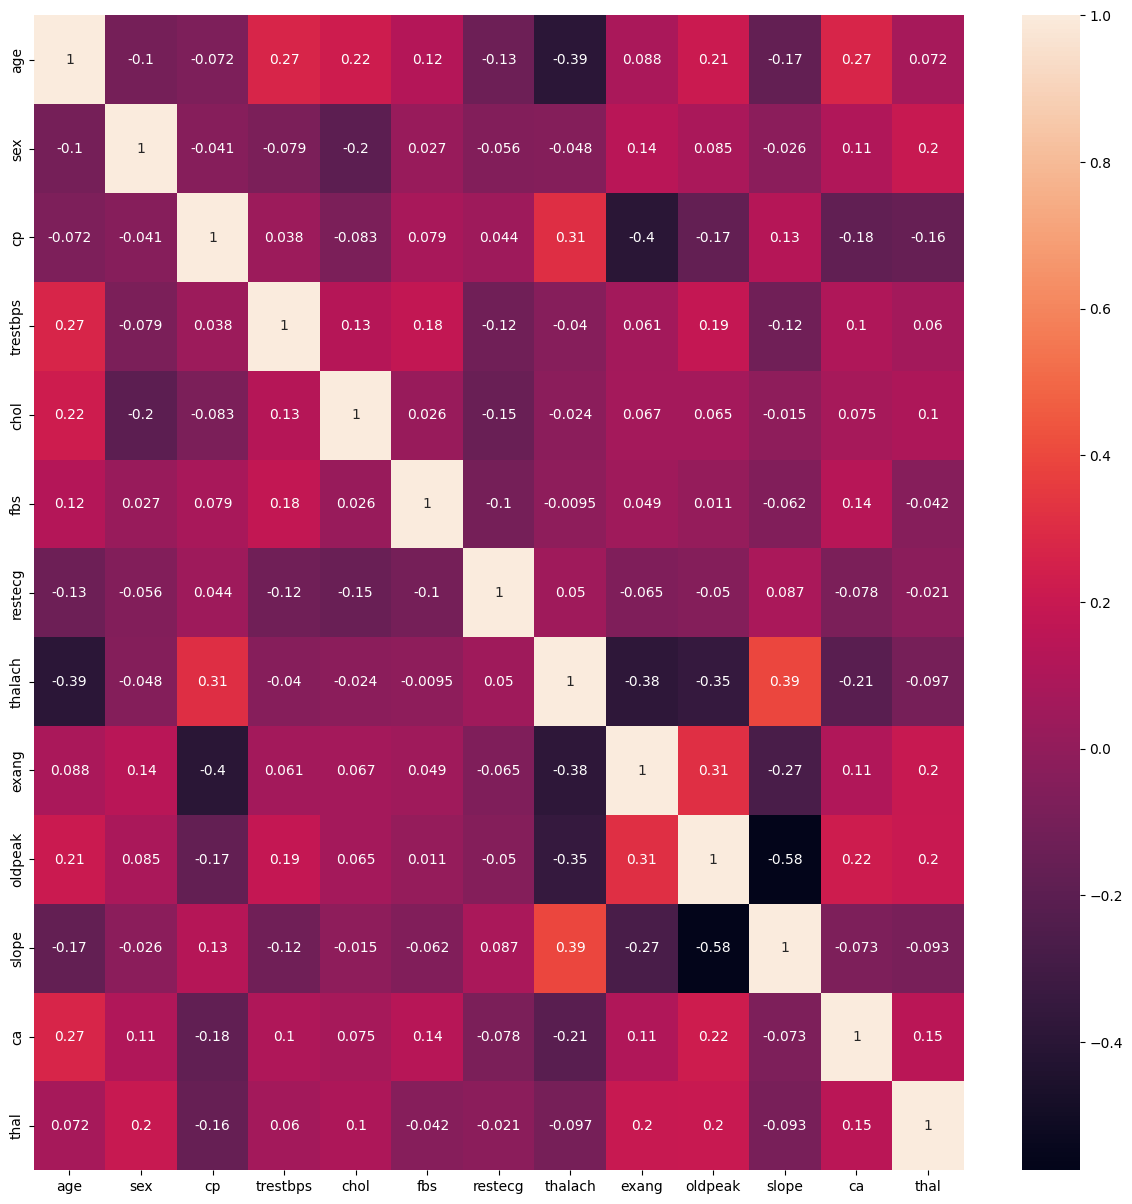

In [14]:
plt.figure(figsize = (15, 15))
sns.heatmap(s, annot = True)

# Outlier Treatment

In [15]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

In [16]:
wisker(dataset['trestbps'])

(90.0, 170.0)

In [17]:
for i in ['trestbps', 'chol', 'thalach', 'oldpeak']:
    lw, uw = wisker(dataset[i])
    dataset[i] = np.where(dataset[i] < lw, lw, dataset[i])
    dataset[i] = np.where(dataset[i] > uw, uw, dataset[i])

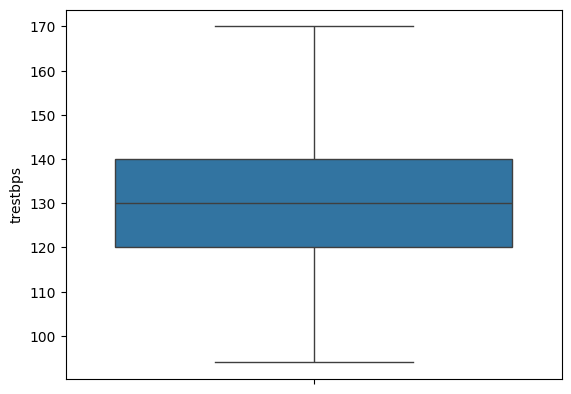

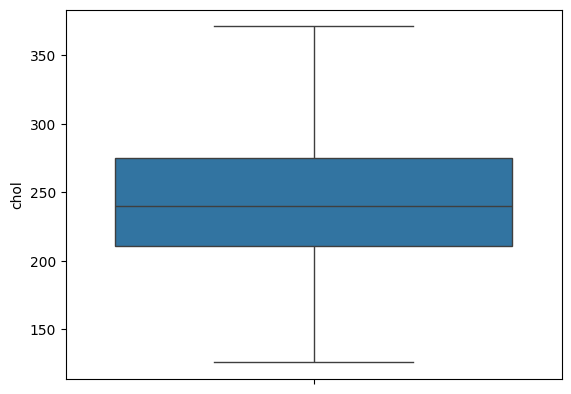

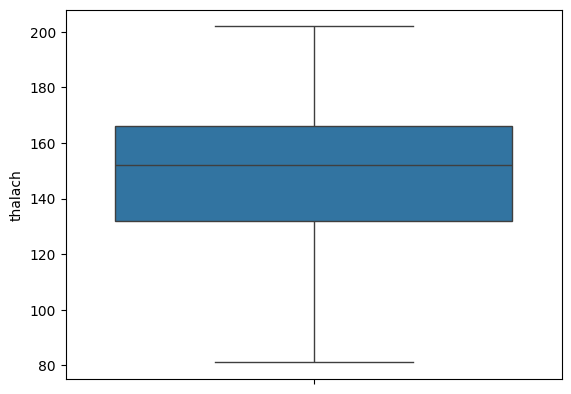

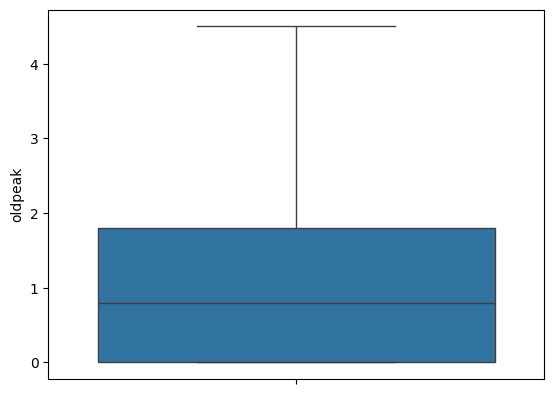

In [18]:
for i in ['trestbps', 'chol', 'thalach', 'oldpeak']:
    sns.boxplot(dataset[i])
    plt.show()

# Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
print(X_train)

[[42.  1.  3. ...  2.  2.  2.]
 [66.  0.  2. ...  1.  1.  2.]
 [53.  1.  2. ...  2.  3.  2.]
 ...
 [65.  1.  3. ...  1.  1.  2.]
 [67.  1.  0. ...  1.  0.  2.]
 [60.  1.  2. ...  1.  0.  2.]]


In [21]:
print(X_test)

[[44.  1.  2. ...  2.  0.  2.]
 [58.  0.  1. ...  2.  2.  2.]
 [63.  1.  0. ...  2.  2.  3.]
 ...
 [43.  0.  2. ...  1.  0.  2.]
 [66.  0.  0. ...  1.  2.  3.]
 [71.  0.  0. ...  1.  0.  2.]]


# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Building the ANN

## Initializing the ANN

In [23]:
ann1 = tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer

In [24]:
ann1.add(tf.keras.layers.Dense(units = 6, activation ='relu'))

## Adding the second hidden layer

In [25]:
ann1.add(tf.keras.layers.Dense(units = 6, activation ='relu'))

## Adding the output layer

In [26]:
ann1.add(tf.keras.layers.Dense(units = 1, activation ='sigmoid'))

# Part 3 - Training the ANN

## Compiling the ANN

In [27]:
ann1.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

## Training the ANN on the Training set

In [28]:
history1 = ann1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 32, epochs = 100)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4991 - loss: 0.7258 - val_accuracy: 0.5220 - val_loss: 0.6987
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5226 - loss: 0.6898 - val_accuracy: 0.5122 - val_loss: 0.6683
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5198 - loss: 0.6797 - val_accuracy: 0.5512 - val_loss: 0.6495
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5526 - loss: 0.6672 - val_accuracy: 0.6488 - val_loss: 0.6333
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5975 - loss: 0.6474 - val_accuracy: 0.6976 - val_loss: 0.6154
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6825 - loss: 0.6252 - val_accuracy: 0.7366 - val_loss: 0.5967
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6957 - loss: 0.6158 - val_accuracy: 0.8098 - val_loss: 0.5762
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7466 - loss: 0.5839 - val_accuracy: 0.8244 - 

# Part 4 - Making the predictions and evaluating the model

## Predicting the result of a single observation

In [29]:
print(ann1.predict(sc.transform([[58, 0, 0, 178, 212, 1, 1, 157, 1, 2.3, 1, 2, 3]])) >0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[False]]


## Predicting the Test set results

In [30]:
y_pred1 = ann1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.9414634146341463

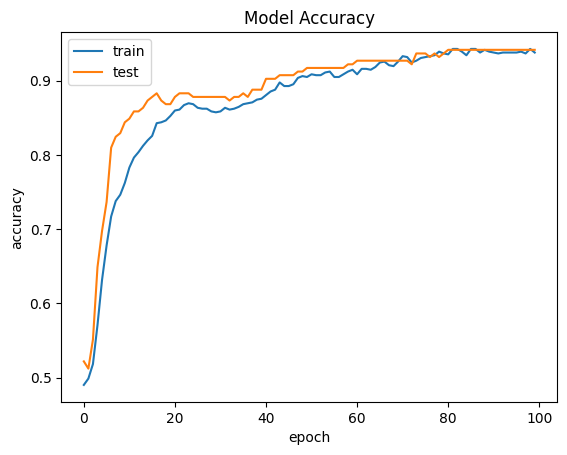

In [32]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

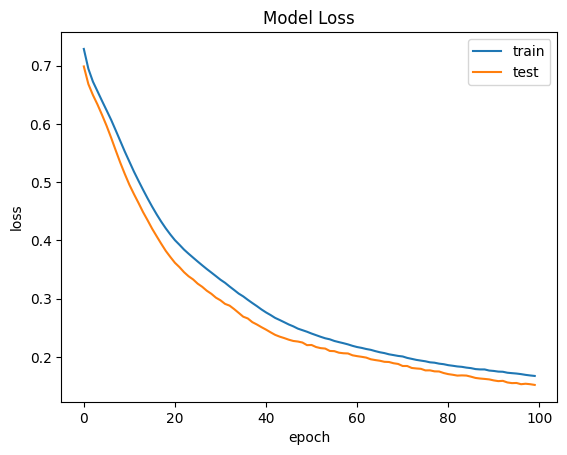

In [33]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Making the Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)

[[ 89   9]
 [  3 104]]


## ANN 2

In [35]:
ann2 = tf.keras.models.Sequential()
ann2.add(tf.keras.layers.Dense(units = 32, activation ='relu'))
ann2.add(tf.keras.layers.Dense(units = 1, activation ='sigmoid'))
ann2.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
history2 = ann2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 32, epochs = 100)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5962 - loss: 0.6524 - val_accuracy: 0.7171 - val_loss: 0.5632
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6926 - loss: 0.5755 - val_accuracy: 0.8293 - val_loss: 0.4693
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7697 - loss: 0.4915 - val_accuracy: 0.8098 - val_loss: 0.4112
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8065 - loss: 0.4353 - val_accuracy: 0.8439 - val_loss: 0.3735
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8240 - loss: 0.4031 - val_accuracy: 0.8634 - val_loss: 0.3495
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8263 - loss: 0.3915 - val_accuracy: 0.8634 - val_loss: 0.3318
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8166 - loss: 0.3866 - val_accuracy: 0.8683 - val_loss: 0.3207
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 0.3512 - val_accuracy: 0.8683 - 

In [36]:
y_pred2 = ann2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)
accuracy_score(y_test, y_pred2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


0.975609756097561

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[ 95   3]
 [  2 105]]


In [38]:
print(ann2.predict(sc.transform([[18, 0, 1, 60, 208, 0, 0, 102, 0, 1, 1, 0, 0]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[ True]]


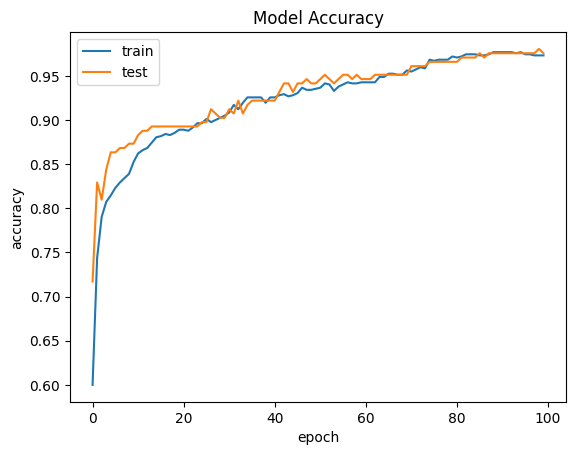

In [39]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

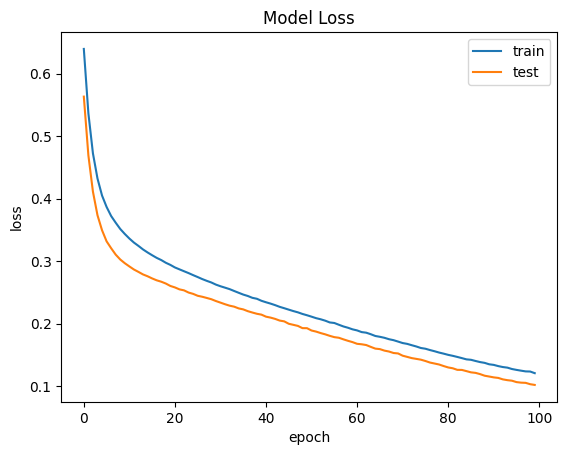

In [40]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## ANN 3

In [41]:
ann3 = tf.keras.models.Sequential()
ann3.add(tf.keras.layers.Dense(units = 16, activation ='relu'))
ann3.add(tf.keras.layers.Dropout(0, 0.3))
ann3.add(tf.keras.layers.Dense(units = 4, activation ='relu'))
ann3.add(tf.keras.layers.Dropout(0, 0.3))
ann3.add(tf.keras.layers.Dense(units = 1, activation ='sigmoid'))
ann3.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
history3 = ann3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 32, epochs = 100)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5103 - loss: 0.6982 - val_accuracy: 0.5707 - val_loss: 0.6839
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5355 - loss: 0.6806 - val_accuracy: 0.6683 - val_loss: 0.6629
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6376 - loss: 0.6635 - val_accuracy: 0.7171 - val_loss: 0.6334
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6557 - loss: 0.6404 - val_accuracy: 0.7415 - val_loss: 0.5940
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7071 - loss: 0.6042 - val_accuracy: 0.7561 - val_loss: 0.5534
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7503 - loss: 0.5643 - val_accuracy: 0.8049 - val_loss: 0.5276
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7777 - loss: 0.5323 - val_accuracy: 0.8244 - val_loss: 0.5090
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8105 - loss: 0.5379 - val_accuracy: 0.8390 - 

In [42]:
y_pred3 = ann3.predict(X_test)
y_pred3 = (y_pred3 > 0.5)
accuracy_score(y_test, y_pred3)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


0.9658536585365853

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)

[[ 96   2]
 [  5 102]]


In [44]:
print(ann3.predict(sc.transform([[18, 0, 1, 60, 208, 0, 0, 102, 0, 1, 1, 0, 0]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[ True]]


In [45]:
print(ann3.predict(sc.transform([[58, 0, 0, 178, 212, 1, 1, 157, 1, 2.3, 1, 2, 3]])) >0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[False]]


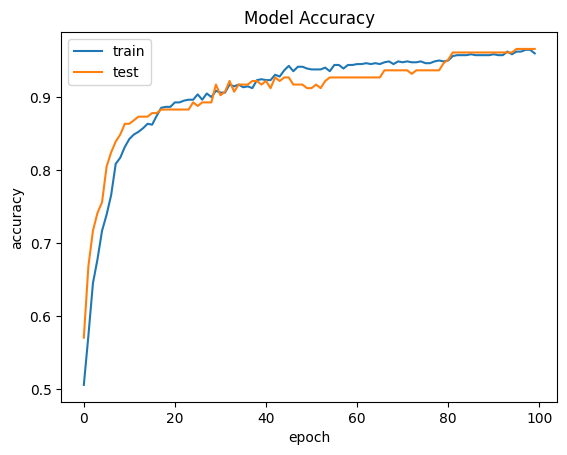

In [46]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

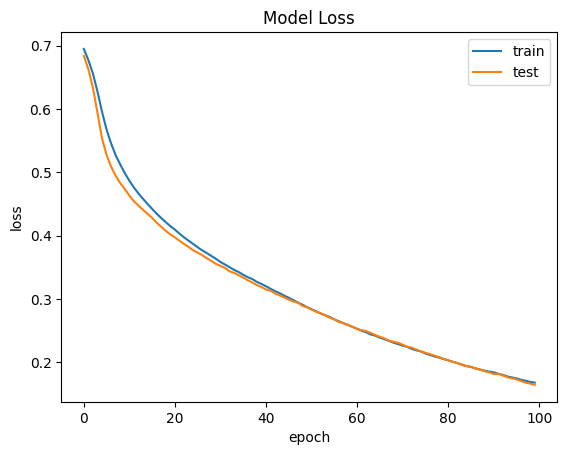

In [47]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()